# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

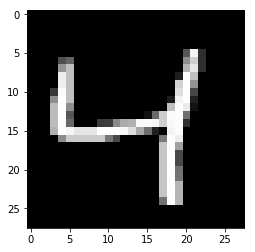

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size], name="inputs")
targets_ = tf.placeholder(tf.float32, [None, image_size], name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="decoded")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6944
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6785
Epoch: 1/20... Training loss: 0.6728
Epoch: 1/20... Training loss: 0.6649
Epoch: 1/20... Training loss: 0.6588
Epoch: 1/20... Training loss: 0.6499
Epoch: 1/20... Training loss: 0.6397
Epoch: 1/20... Training loss: 0.6271
Epoch: 1/20... Training loss: 0.6139
Epoch: 1/20... Training loss: 0.5991
Epoch: 1/20... Training loss: 0.5830
Epoch: 1/20... Training loss: 0.5670
Epoch: 1/20... Training loss: 0.5514
Epoch: 1/20... Training loss: 0.5342
Epoch: 1/20... Training loss: 0.5165
Epoch: 1/20... Training loss: 0.5008
Epoch: 1/20... Training loss: 0.4804
Epoch: 1/20... Training loss: 0.4615
Epoch: 1/20... Training loss: 0.4452
Epoch: 1/20... Training loss: 0.4334
Epoch: 1/20... Training loss: 0.4186
Epoch: 1/20... Training loss: 0.4032
Epoch: 1/20... Training loss: 0.3945
Epoch: 1/20... Training loss: 0.3825
E

Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1880
E

Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1533
E

Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1355
E

Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1252
E

Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1109
E

Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1135
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1067
E

Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1046
E

Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0988
E

Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0931
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0998
E

Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0966
E

Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0888
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0987
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

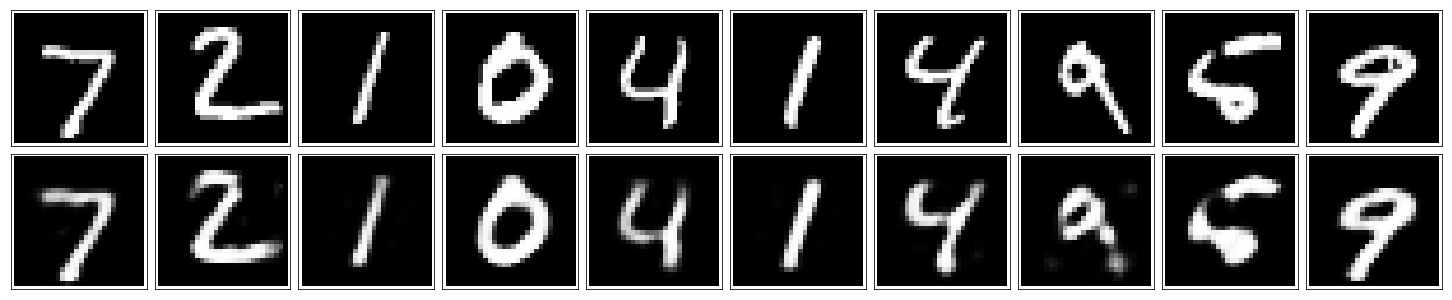

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.